# Introduction
K-means is vastly used for clustering in many data science applications, especially useful if you need to quickly discover insights from unlabeled data. In this Dataset i have segment the students into two groups, one is Good in Data Science and Another one is Good in Web Developement.

# Import libraries
Run %matplotlib inline since we will be plotting in this section

In [1]:
import pandas as pd # import library to read data into dataframe
import numpy as np # import numpy library
import matplotlib.pyplot as plt  # Visualizing the Data

### Load Data From Excel File
Use head() to display the first five rows

In [2]:
df = pd.read_excel("mavoix_ml_sample_dataset.xlsx")
df.head()

,Application_ID,Current City,Python (out of 3),R Programming (out of 3),Deep Learning (out of 3),PHP (out of 3),MySQL (out of 3),HTML (out of 3),CSS (out of 3),JavaScript (out of 3),...,Node.js (out of 3),ReactJS (out of 3),Other skills,Degree,Stream,Current Year Of Graduation,Performance_PG,Performance_UG,Performance_12,Performance_10
0,ML0001,Bangalore,0,2,0,2,0,2,3,2,...,0,0,R Programming,Bachelor of Science (B.Sc),Mathematics,2017,NaN,NaN,NaN,NaN
1,ML0002,Bangalore,2,0,0,2,2,2,2,2,...,0,0,"Data Science, Machine Learning, Neural Network...",Bachelor of Technology (B.Tech),Computer Science & Engineering,2019,NaN,85.50/100,92.20/92.20,96.60/96.60
2,ML0003,Bangalore,3,0,1,2,2,2,0,2,...,0,0,"Algorithms, Data Structures, Python, C Program...",Master of Science (M.Sc),Computer Science,2018,7.91/10,70.00/100,64.83/64.83,77.60/77.60
3,ML0004,Bangalore,2,0,2,1,0,2,0,0,...,0,0,"CSS, Deep Learning, Embedded Systems, HTML, Ma...",Bachelor of Engineering (B.E),Electronics and Communication,2019,NaN,6.86/10,76.00/76.00,84.32/84.32
4,ML0005,Bangalore,2,0,0,2,0,2,1,1,...,2,2,"HTML, OpenCV, Python, SQL, C++ Programming, CS...",Bachelor of Technology (B.Tech),Production Engineering,2018,NaN,6.38/10,65.20/65.20,68.80/68.80


##### Displaying Degree of the total students

In [3]:
df["Degree"].value_counts().to_frame()

,Degree
Bachelor of Technology (B.Tech),110
Bachelor of Engineering (B.E),84
Master of Computer Applications (MCA),70
B.Tech (Hons.),25
Master of Technology (M.Tech),19
Master of Science (M.Sc),14
Bachelor of Computer Applications (BCA),10
Post Graduate Programme (PGP),8
Bachelor of Science (B.Sc),5
Integrated M.Sc.,5


##### Total Null Values in the given Dataset

In [4]:
df.isnull().sum().to_frame()

,0
Application_ID,0
Current City,0
Python (out of 3),0
R Programming (out of 3),0
Deep Learning (out of 3),0
PHP (out of 3),0
MySQL (out of 3),0
HTML (out of 3),0
CSS (out of 3),0
JavaScript (out of 3),0


##### Most of the students are staying in Bengaluru

In [5]:
df["Current City"].value_counts().to_frame()

,Current City
Bangalore,214
Hyderabad,22
Banglore,14
Chennai,12
Pune,10
...,...
Tezpur,1
Idupulapaya,1
Akola,1
Mangaluru,1


##### Dropping unnecessary columns

In [6]:
# Drop the Columns
df1 = df.drop(["Degree","Application_ID","Unnamed: 10", "Other skills", "Stream", "Performance_PG", "Performance_UG", "Performance_12", "Performance_10","Current Year Of Graduation"], axis = 1)

In [7]:
df1.head() # First fivr values

,Current City,Python (out of 3),R Programming (out of 3),Deep Learning (out of 3),PHP (out of 3),MySQL (out of 3),HTML (out of 3),CSS (out of 3),JavaScript (out of 3),AJAX (out of 3),Bootstrap (out of 3),MongoDB (out of 3),Node.js (out of 3),ReactJS (out of 3)
0,Bangalore,0,2,0,2,0,2,3,2,0,2,0,0,0
1,Bangalore,2,0,0,2,2,2,2,2,0,0,0,0,0
2,Bangalore,3,0,1,2,2,2,0,2,0,0,0,0,0
3,Bangalore,2,0,2,1,0,2,0,0,0,0,0,0,0
4,Bangalore,2,0,0,2,0,2,1,1,0,0,2,2,2


#### Rename the Column Names

In [8]:
df2 = df1.rename(columns={"Python (out of 3)": "Python", "R Programming (out of 3)": "R Programming", "Deep Learning (out of 3)":"Deep Learning", "PHP (out of 3)":"PHP", "MySQL (out of 3)":"MySQL", "HTML (out of 3)":"HTML", "CSS (out of 3)":"CSS", "JavaScript (out of 3)":"JavaScript", "AJAX (out of 3)":"AJAX", "Bootstrap (out of 3)": "Bootstrap", "MongoDB (out of 3)":"MongoDB", "Node.js (out of 3)":"Node.js", "ReactJS (out of 3)":"ReactJS"})
df2.head()

,Current City,Python,R Programming,Deep Learning,PHP,MySQL,HTML,CSS,JavaScript,AJAX,Bootstrap,MongoDB,Node.js,ReactJS
0,Bangalore,0,2,0,2,0,2,3,2,0,2,0,0,0
1,Bangalore,2,0,0,2,2,2,2,2,0,0,0,0,0
2,Bangalore,3,0,1,2,2,2,0,2,0,0,0,0,0
3,Bangalore,2,0,2,1,0,2,0,0,0,0,0,0,0
4,Bangalore,2,0,0,2,0,2,1,1,0,0,2,2,2


#### Selecting the potential skills Python, R and Deep Learning For Data Science
These best three skills define a student he is good or bad in Data Science

In [10]:
# Select three potential Columns
df3 = df2.loc[:,["Python", "R Programming", "Deep Learning"]]
df3.head()

,Python,R Programming,Deep Learning
0,0,2,0
1,2,0,0
2,3,0,1
3,2,0,2
4,2,0,0


In [11]:
X = df3.iloc[:, [0,1,2]].values  # Values converted to array
X

array([[0, 2, 0],
       [2, 0, 0],
       [3, 0, 1],
       ...,
       [1, 0, 0],
       [2, 2, 0],
       [2, 3, 0]], dtype=int64)

#### Using Elbow method trying to know the number of clusters

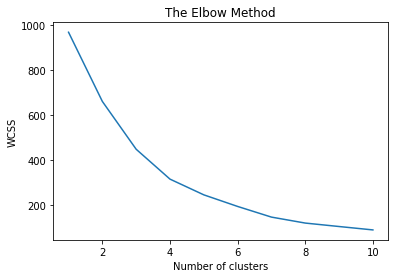

In [12]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [14]:
k_means_labels1 = kmeans.labels_   # Labels in the Dataset

In [15]:
# Adding labelis in the given dataset
df3["Data Sientist"] = k_means_labels1
df3.head(5)

,Python,R Programming,Deep Learning,Data Sientist
0,0,2,0,1
1,2,0,0,0
2,3,0,1,0
3,2,0,2,3
4,2,0,0,0


## In this problem I decided that those who are good in Python and Deep Learning, Those students are also good in Data Science

In [16]:
# Replacing Names
df3["Data Sientist"].replace(0, "Good in Python", inplace = True)
df3["Data Sientist"].replace(1, "Good in R", inplace = True)
df3["Data Sientist"].replace(2, "Basic in Python", inplace = True)
df3["Data Sientist"].replace(3, "Good In Data Science", inplace = True)
df3.head()

,Python,R Programming,Deep Learning,Data Sientist
0,0,2,0,Good in R
1,2,0,0,Good in Python
2,3,0,1,Good in Python
3,2,0,2,Good In Data Science
4,2,0,0,Good in Python


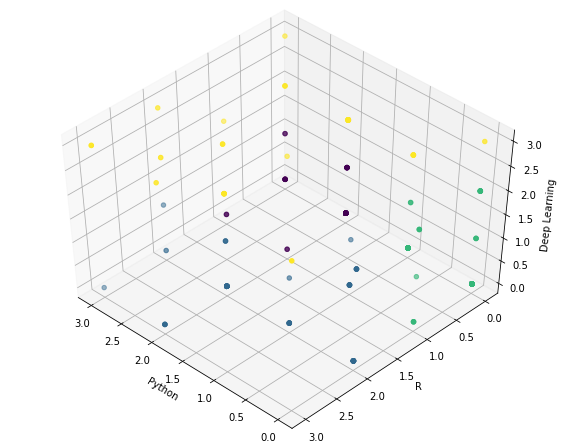

In [17]:
# Visualize the DataSet using 3D picture
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Python')
ax.set_ylabel('R')
ax.set_zlabel('Deep Learning')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c= k_means_labels1.astype(np.float))

#### Selecting the potential skills for Wed Developement 
These best skills define a student he is good or bad in Web Developement

In [19]:
# Selecting number of columns
df4 = df2.loc[:,["PHP","MySQL","HTML","CSS","JavaScript","AJAX","Bootstrap","MongoDB","Node.js","ReactJS"]]
df4.head()

,PHP,MySQL,HTML,CSS,JavaScript,AJAX,Bootstrap,MongoDB,Node.js,ReactJS
0,2,0,2,3,2,0,2,0,0,0
1,2,2,2,2,2,0,0,0,0,0
2,2,2,2,0,2,0,0,0,0,0
3,1,0,2,0,0,0,0,0,0,0
4,2,0,2,1,1,0,0,2,2,2


In [20]:
#Convert into array
Y = df4.iloc[:, 0:10].values  # Values converted to array
Y

array([[2, 0, 2, ..., 0, 0, 0],
       [2, 2, 2, ..., 0, 0, 0],
       [2, 2, 2, ..., 0, 0, 0],
       ...,
       [0, 0, 2, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [2, 0, 2, ..., 0, 0, 0]], dtype=int64)

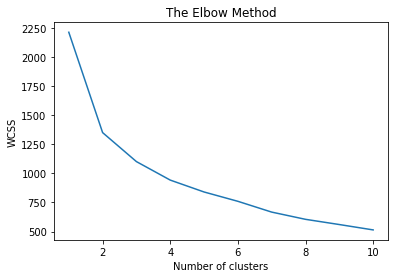

In [21]:
# Elbow Method Visualize
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(Y)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [22]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(Y)

In [23]:
k_means_labels = kmeans.labels_   # Labels in the Dataset

In [24]:
# Adding labelis in the given dataset
df4["WebDevelopement"] = k_means_labels
df4.head(5)

,PHP,MySQL,HTML,CSS,JavaScript,AJAX,Bootstrap,MongoDB,Node.js,ReactJS,WebDevelopement
0,2,0,2,3,2,0,2,0,0,0,0
1,2,2,2,2,2,0,0,0,0,0,0
2,2,2,2,0,2,0,0,0,0,0,0
3,1,0,2,0,0,0,0,0,0,0,1
4,2,0,2,1,1,0,0,2,2,2,0


In [25]:
df4["WebDevelopement"].replace(0, "Potential candidates", inplace = True)
df4["WebDevelopement"].replace(1, "Not potential candidates", inplace = True)
df4.head()

,PHP,MySQL,HTML,CSS,JavaScript,AJAX,Bootstrap,MongoDB,Node.js,ReactJS,WebDevelopement
0,2,0,2,3,2,0,2,0,0,0,Potential candidates
1,2,2,2,2,2,0,0,0,0,0,Potential candidates
2,2,2,2,0,2,0,0,0,0,0,Potential candidates
3,1,0,2,0,0,0,0,0,0,0,Not potential candidates
4,2,0,2,1,1,0,0,2,2,2,Potential candidates


In [26]:
df["WebDevelopement"] = df4["WebDevelopement"]
df["Data Sientist"] = df3["Data Sientist"]

In [27]:
df.head()

,Application_ID,Current City,Python (out of 3),R Programming (out of 3),Deep Learning (out of 3),PHP (out of 3),MySQL (out of 3),HTML (out of 3),CSS (out of 3),JavaScript (out of 3),...,Other skills,Degree,Stream,Current Year Of Graduation,Performance_PG,Performance_UG,Performance_12,Performance_10,WebDevelopement,Data Sientist
0,ML0001,Bangalore,0,2,0,2,0,2,3,2,...,R Programming,Bachelor of Science (B.Sc),Mathematics,2017,NaN,NaN,NaN,NaN,Potential candidates,Good in R
1,ML0002,Bangalore,2,0,0,2,2,2,2,2,...,"Data Science, Machine Learning, Neural Network...",Bachelor of Technology (B.Tech),Computer Science & Engineering,2019,NaN,85.50/100,92.20/92.20,96.60/96.60,Potential candidates,Good in Python
2,ML0003,Bangalore,3,0,1,2,2,2,0,2,...,"Algorithms, Data Structures, Python, C Program...",Master of Science (M.Sc),Computer Science,2018,7.91/10,70.00/100,64.83/64.83,77.60/77.60,Potential candidates,Good in Python
3,ML0004,Bangalore,2,0,2,1,0,2,0,0,...,"CSS, Deep Learning, Embedded Systems, HTML, Ma...",Bachelor of Engineering (B.E),Electronics and Communication,2019,NaN,6.86/10,76.00/76.00,84.32/84.32,Not potential candidates,Good In Data Science
4,ML0005,Bangalore,2,0,0,2,0,2,1,1,...,"HTML, OpenCV, Python, SQL, C++ Programming, CS...",Bachelor of Technology (B.Tech),Production Engineering,2018,NaN,6.38/10,65.20/65.20,68.80/68.80,Potential candidates,Good in Python


# Solution

## (a) Potential Candidate In Web Developement

In [28]:
Web_Developement = df[df['WebDevelopement']=='Potential candidates'].drop("Data Sientist", axis = 1)
Web_Developement.set_index('WebDevelopement', inplace = True)
Web_Developement.head()

,Application_ID,Current City,Python (out of 3),R Programming (out of 3),Deep Learning (out of 3),PHP (out of 3),MySQL (out of 3),HTML (out of 3),CSS (out of 3),JavaScript (out of 3),...,Node.js (out of 3),ReactJS (out of 3),Other skills,Degree,Stream,Current Year Of Graduation,Performance_PG,Performance_UG,Performance_12,Performance_10
WebDevelopement,,,,,,,,,,,,,,,,,,,,,
Potential candidates,ML0001,Bangalore,0,2,0,2,0,2,3,2,...,0,0,R Programming,Bachelor of Science (B.Sc),Mathematics,2017,NaN,NaN,NaN,NaN
Potential candidates,ML0002,Bangalore,2,0,0,2,2,2,2,2,...,0,0,"Data Science, Machine Learning, Neural Network...",Bachelor of Technology (B.Tech),Computer Science & Engineering,2019,NaN,85.50/100,92.20/92.20,96.60/96.60
Potential candidates,ML0003,Bangalore,3,0,1,2,2,2,0,2,...,0,0,"Algorithms, Data Structures, Python, C Program...",Master of Science (M.Sc),Computer Science,2018,7.91/10,70.00/100,64.83/64.83,77.60/77.60
Potential candidates,ML0005,Bangalore,2,0,0,2,0,2,1,1,...,2,2,"HTML, OpenCV, Python, SQL, C++ Programming, CS...",Bachelor of Technology (B.Tech),Production Engineering,2018,NaN,6.38/10,65.20/65.20,68.80/68.80
Potential candidates,ML0006,Bangalore,2,0,0,1,0,3,2,1,...,0,0,"Data Analytics, Machine Learning, MySQL, Python",NaN,Data Science Engineering,2019,NaN,70.00/100,NaN,NaN


## (b) Potential Candidate In Data Science

In [29]:
Data_Scientist = df[df['Data Sientist']=='Good In Data Science'].drop("WebDevelopement", axis = 1)
Data_Scientist.set_index('Data Sientist', inplace = True)
Data_Scientist.head()

,Application_ID,Current City,Python (out of 3),R Programming (out of 3),Deep Learning (out of 3),PHP (out of 3),MySQL (out of 3),HTML (out of 3),CSS (out of 3),JavaScript (out of 3),...,Node.js (out of 3),ReactJS (out of 3),Other skills,Degree,Stream,Current Year Of Graduation,Performance_PG,Performance_UG,Performance_12,Performance_10
Data Sientist,,,,,,,,,,,,,,,,,,,,,
Good In Data Science,ML0004,Bangalore,2,0,2,1,0,2,0,0,...,0,0,"CSS, Deep Learning, Embedded Systems, HTML, Ma...",Bachelor of Engineering (B.E),Electronics and Communication,2019,NaN,6.86/10,76.00/76.00,84.32/84.32
Good In Data Science,ML0010,Bangalore,2,0,2,0,0,2,2,2,...,0,2,"MS-Office, Computer Vision, Data Analytics, De...",Post Graduate Programme (PGP),Artificial Intelligence And Machine Learning,2020,71.00/100,60.00/100,71.00/71.00,NaN
Good In Data Science,ML0012,Jaipur,3,0,2,1,0,2,0,0,...,0,0,"Python, C++ Programming, Data Analytics, Deep ...",Bachelor of Technology (B.Tech),Electronics and Communication,2021,NaN,7.60/10,89.60/89.60,NaN
Good In Data Science,ML0024,Bangalore,2,0,2,0,0,0,0,0,...,0,0,"Deep Learning, Machine Learning, Python",Bachelor of Technology (B.Tech),Electronics and Instrumentation,2018,NaN,NaN,NaN,NaN
Good In Data Science,ML0028,Bangalore,2,0,2,0,0,0,0,0,...,0,0,"Artifical Intelligence, C++ Programming, Deep ...",Master of Technology (M.Tech),Digital Communication & Networking,2012,76.70/100,68.00/100,72.00/72.00,NaN


# Thank You